In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Viết câu lệnh đọc file Adv.cs

In [50]:
df = pd.read_csv('Adv.csv',header=None)
df

,0,1,2,3
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
95,163.3,31.6,52.9,16.9
96,197.6,3.5,5.9,11.7
97,184.9,21.0,22.0,15.5
98,289.7,42.3,51.2,25.4


2. Tách dữ liệu thành hai tập X và y. Trong đó y là cột cuối, X gồm các cột còn lại

In [51]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# df=pd.read_csv('Adv.csv',header=None).values
# X=df[:,:-1]
# y=df[:,-1]

3. Nối cột số 1 vào đầu tập X.

In [52]:
X = pd.concat([pd.Series(1,index=X.index, name = "Nhung"), X], axis = 1)
X

,Nhung,0,1,2
0,1,230.1,37.8,69.2
1,1,44.5,39.3,45.1
2,1,17.2,45.9,69.3
3,1,151.5,41.3,58.5
4,1,180.8,10.8,58.4
...,...,...,...,...
95,1,163.3,31.6,52.9
96,1,197.6,3.5,5.9
97,1,184.9,21.0,22.0
98,1,289.7,42.3,51.2


4. Đưa dữ liệu về 0 đến 1 bằng cách chia cho giá trị lớn nhất tại mỗi cột

In [53]:
N,d=X.shape
for i in range(0, d-1):
    X[i] = X[i]/np.max(X[i])

5. Viết hàm dự đoán

In [54]:
def predict(theta, X):
  return theta*X

6. Viết hàm mất mát

In [55]:
def cost_function(X,y,theta):
  y1 = predict(theta, X)
  y1 = np.sum(y1, axis = 1)
  return sum((y1-y)**2)/(2*N)

7. Viết hàm train

In [56]:
def train(X, y, theta, learning_rate, iters):
  cost_history = []
  for i in range(iters):
    y1=predict(theta, X)
    y1 = np.sum(y1,axis=1)
    for j in range(0,d):
      theta[j] = theta[j] - learning_rate*(sum((y1-y)*X.iloc[:,j]))/N
    cost = cost_function(X,y,theta)
    cost_history.append(cost)
  return cost_history, cost, theta

8. Sử dụng hàm train để train bộ dữ liệu trên

In [61]:
iters = 100
theta = np.array([0.1]*d)
cost_history, cost, theta = train(X, y, theta, 0.05, iters)
y_hat=predict(theta, X)
y_hat=np.sum(y_hat, axis=1)


9. Vẽ biểu độ biểu thị sự giảm giá trị của hàm mất mát trong quá trình train

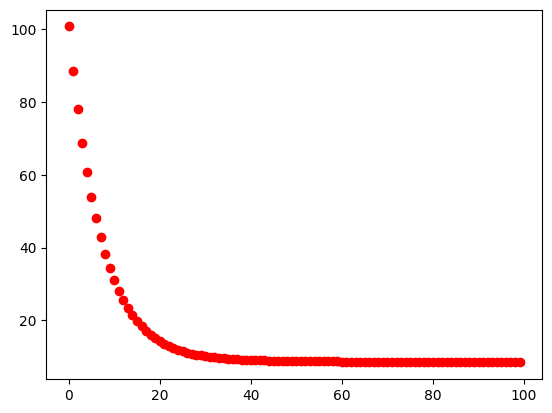

In [62]:

plt.figure()
plt.scatter(x=list(range(0, iters)),y= cost_history, color ='red')
plt.show()

10. Lọc ra 10 dòng dữ liệu đầu tiên. Sử dụng tham số đã train để tìm kết quả, so sanh kết qua với y thực

In [63]:
X_test=X.iloc[0:10]
X_test

,Nhung,0,1,2
0,1,0.189429,0.762097,0.607018
1,1,0.036635,0.792339,0.395614
2,1,0.014160,0.925403,0.607895
3,1,0.124722,0.832661,0.513158
4,1,0.148843,0.217742,0.512281
5,1,0.007162,0.985887,0.657895
6,1,0.047337,0.661290,0.206140
7,1,0.098954,0.395161,0.101754
8,1,0.007080,0.042339,0.008772
9,1,0.987734,0.052419,0.185965


In [67]:
y_hat_test = predict(theta, X_test)
y_hat_test = np.sum(y_hat_test, axis=1)
y_hat_test

,0
0,17.304105
1,16.545397
2,17.944425
3,17.366697
4,13.223625
5,18.468655
6,15.187087
7,13.237045
8,10.331195
9,13.540300


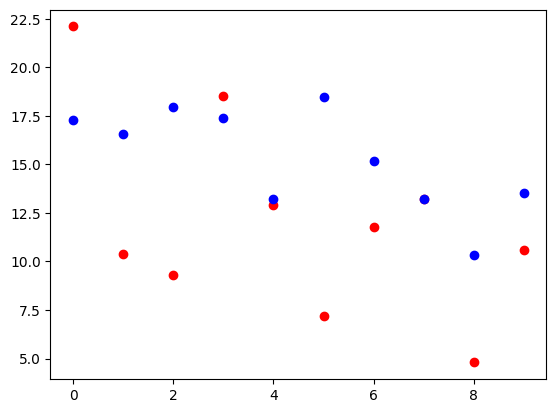

In [69]:
y1=y.iloc[0:10]
plt.scatter(x=list(range(0, len(y_hat_test))),y=y1, color ='red')
plt.scatter(x=list(range(0, len(y_hat_test))),y=y_hat_test, color ='blue')
plt.show()